## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_combined_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
# Display the data table for preview
mouse_data_combined_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_data_combined_df["Mouse ID"].unique())
print(mouse_count)


249


In [ ]:
#-------------- COME BACK TO THIS
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# dupes = mouse_data_combined_df["Mouse ID"].duplicated()
# mouse_data_combined_df["Mouse ID"][dupes]
# matches = mouse_data_combined_df["Mouse ID"].isin(mouse_data_combined_df["Timepoint"])
# mouse_data_combined_df["Mouse ID"][matches]

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 
# ID is g989


In [3]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# mouse_data_combined_df.drop_duplicates("Mouse ID")
mouse_data_cleaned_df = mouse_data_combined_df.drop_duplicates(subset=["Mouse ID" , "Timepoint"], keep="last")
mouse_data_cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice in the clean DataFrame.
#  -----------NOT SURE THIS IS RIGHT
mouse_count_clean = len(mouse_data_cleaned_df["Mouse ID"].unique())
print(mouse_count_clean)


249


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#--------------------------------- 
mouse_data_grouped_df = mouse_data_cleaned_df.groupby(["Drug Regimen"])
mouse_data_grouped_df.head()

# Demonstrate calculating measures of central tendency
# mean
drug_reg = mouse_data_cleaned_df ["Drug Regimen"]
tumor_vol = mouse_data_grouped_df ["Tumor Volume (mm3)"]
tumor_vol_mean = (tumor_vol).mean()
print(tumor_vol_mean)

# median
drug_reg = mouse_data_cleaned_df ["Drug Regimen"]
tumor_vol = mouse_data_grouped_df ["Tumor Volume (mm3)"]
tumor_vol_med = (tumor_vol).median()
print(tumor_vol_med)

# # Demonstrate calculating the variance and standard deviation using the different modules
# variance
drug_reg = mouse_data_cleaned_df ["Drug Regimen"]
tumor_vol = mouse_data_grouped_df ["Tumor Volume (mm3)"]
tumor_vol_var = (tumor_vol).var()
print(tumor_vol_var)

# std
drug_reg = mouse_data_cleaned_df ["Drug Regimen"]
tumor_vol = mouse_data_grouped_df ["Tumor Volume (mm3)"]
tumor_vol_std = (tumor_vol).std()
print(tumor_vol_std)

# # Standard Error
drug_reg = mouse_data_cleaned_df ["Drug Regimen"]
tumor_vol = mouse_data_grouped_df ["Tumor Volume (mm3)"]
tumor_vol_sem = (tumor_vol).sem()
print(tumor_vol_sem)


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.382993
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.783528
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.220205
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Pro

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol_table =({
    "Mean Tumor Volume": tumor_vol_mean,
    "Median Tumor Volume": tumor_vol_med,
    "Tumor Volume Variance": tumor_vol_var,
    "Tumor Volume Standard Deviation": tumor_vol_std,
    "Tumor Volume Standard Error": tumor_vol_sem,
})
tumor_table_df = pd.DataFrame(tumor_vol_table)
tumor_table_df
# Using the aggregation method, produce the same summary statistics in a single line


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

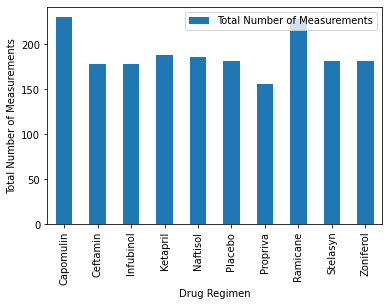

<Figure size 432x288 with 0 Axes>

In [7]:
# "Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas."

# Mindie - "value count on the drug regimen. it should be the total number of measurements.
# not  sure why they have the image labeled as "Number of Unique Mice Tested" because the solution code is
# naming it as "Total Number of Measurements"

# --------Plotting bar plot using DataFrame.plot()---------
# Create a bar chart based off of the group series from before

# Count of drug regimen (total number of measurements)
drug_reg = mouse_data_grouped_df ["Drug Regimen"]
drug_reg_cnt = drug_reg.count()
# print(drug_reg_cnt)

# Total # of Measurements per Drug Regimen dataframe
tumor_reg_table =({
    "Drug Regimen": drug_reg,
    "Total Number of Measurements": drug_reg_cnt,
})
tumor_reg_df = pd.DataFrame(tumor_reg_table)
tumor_reg_df

# Total # of Measurements per Drug Regimen bar plot
tumor_reg_pdbar = tumor_reg_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
tumor_reg_pdbar.set_xlabel("Drug Regimen")
tumor_reg_pdbar.set_ylabel("Total Number of Measurements")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Total Number of Measurements')

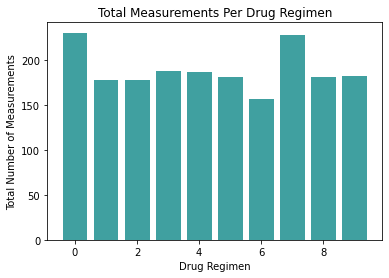

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_reg = mouse_data_grouped_df ["Drug Regimen"]
drug_reg_cnt = drug_reg.count()
x_axis = np.arange(len(drug_reg_cnt))
plt.bar(x_axis, drug_reg_cnt, alpha=.75, color="teal", align="center")

# ---------------------------!!!!!!!!!!!!!WHY ISN'T DRUG REGIMEN LABEL WORKING!!!!!!!!!!!!--------------------------------
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, drug_reg)

plt.title("Total Measurements Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")

958
930


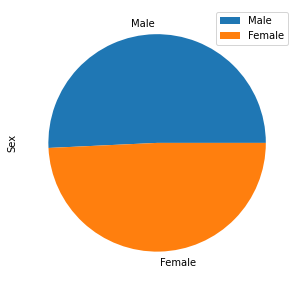

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pand_sex_m = mouse_data_cleaned_df.loc[(mouse_data_cleaned_df["Sex"])=="Male"]
pand_sex_m_cnt = len(pand_sex_m)
print(pand_sex_m_cnt)

pand_sex_f = mouse_data_cleaned_df.loc[(mouse_data_cleaned_df["Sex"])=="Female"]
pand_sex_f_cnt = len(pand_sex_f)
print(pand_sex_f_cnt)

pand_mf_df = pd.DataFrame({"Sex": [pand_sex_m_cnt ,  pand_sex_f_cnt],
                   "Total Measurements": [958, 930]},
                  index=["Male" , "Female"])
plot = pand_mf_df.plot.pie(y="Sex", figsize=(5, 5))



([<matplotlib.patches.Wedge at 0x266c9752940>,
 [Text(-1.0997015355311284, -0.025622895044835673, 'Male'),
  Text(1.099701537930112, 0.02562279208334746, 'Female')])

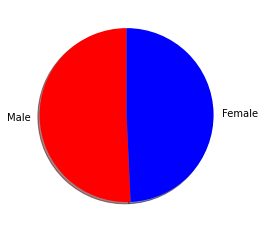

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# # The values of each section of the pie chart
sizes = [(pand_sex_m_cnt),
           (pand_sex_f_cnt)]

# The colors of each section of the pie chart
colors = ["red", "blue"]

plt.pie(sizes, labels=labels, colors=colors, shadow=True, startangle=90)

## Quartiles, Outliers and Boxplots

In [69]:
mouse_data_grouped_df = mouse_data_cleaned_df.groupby(["Drug Regimen"])
mouse_data_grouped_df.head()

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# ---------
timepoint_df = mouse_data_cleaned_df.drop_duplicates(subset=["Mouse ID"], keep = "last")
timepoint_df
# time_drug_reg_df = timepoint_df.groupby(["Drug Regimen"])
# time_drug_reg_df.head()
four_reg_df = timepoint_df.loc[(timepoint_df["Drug Regimen"] == "Capomulin") | (timepoint_df["Drug Regimen"] == "Ramicane") | 
 (timepoint_df["Drug Regimen"] == "Infubinol") | (timepoint_df["Drug Regimen"] == "Ceftamin"), :]
four_reg_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [ ]:
# # Put treatments into a list for for loop (and later for plot labels)
# drug_regs = four_reg_df(["Capomulin" , "Ramicane" , "Infubinol" , "Ceftamin"])

# # Create empty list to fill with tumor vol data (for plotting)
# fin_tum_vol = []

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
# quartiles = temperatures.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

    
#     # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
#     # add subset 
    
    
#     # Determine outliers using upper and lower bounds
    

ValueError: 'infubinol' is not a valid value for loc; supported values are 'left', 'center', 'right'

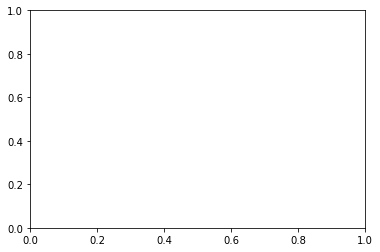

In [75]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fin_tum_vol = four_reg_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title("Capomulin" , "Ramicane" , "Infubinol" , "Ceftamin")
ax1.set_ylabel("Final Tumor Volume")
ax1.boxplot(fin_tum_vol)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
